# Atividade 2: Otimizadores 

O objetivo desta atividade é resolver o problema acima, usando os algoritmos de otimização
irrestrita visto em aula. O aluno deve entregar os códigos implementados e um relatório
comparando a convergência dos diferentes algoritmos.

In [2]:
import numpy as np   #Manipular Matrizes 
import pandas as pd  #Manipular TabelasBD
import random        #Gera numeros aleatorios 

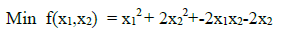

In [3]:
def Func_Poly(x1,x2):
    return x1**2 + 2*(x2**2) - 2*x1*x2 - 2*x2

-----------------
## Gradiente Descendente

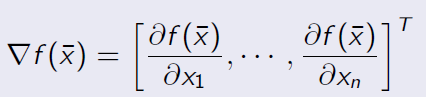

In [4]:
def grad(x1, x2):
    return np.array([2*x1 - 2*x2, 4*x2 -2*x1 -2])

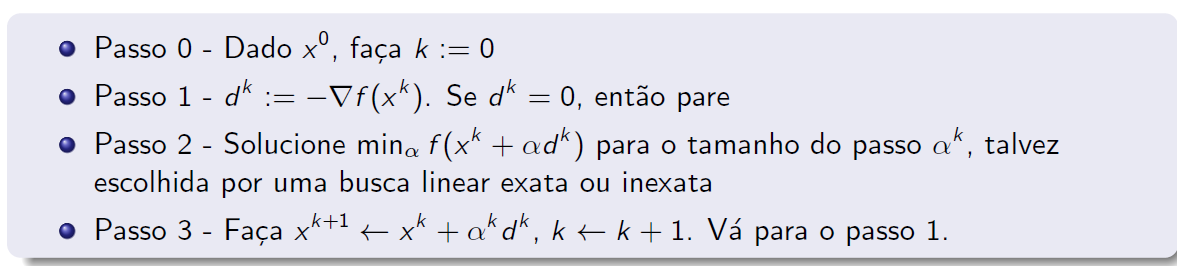

In [5]:
#Inicializando
alpha = 0.2
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [6]:
#Gradiente Descendent
for k in range(0,interaction):
    x = x - alpha*grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break 

[7.6 5.2] 0
[6.64 4.48] 1
[5.776 3.952] 2
[5.0464 3.5008] 3
[4.42816 3.11872] 4
[3.904384 2.795008] 5
[3.4606336 2.5207552] 6
[3.08468224 2.28840448] 7
[2.76617114 2.09155379] 8
[2.4963242  1.92477921] 9
[2.2677062  1.78348552] 10
[2.07401793 1.66377959] 11
[1.90992259 1.56236309] 12
[1.77089879 1.47644166] 13
[1.65311594 1.40364785] 14
[1.5533287  1.34197594] 15
[1.4687876  1.28972667] 16
[1.39716323 1.24546037] 17
[1.33648209 1.20795737] 18
[1.2850722  1.17618431] 19
[1.24151704 1.14926574] 20
[1.20461652 1.12645996] 21
[1.1733539 1.1071386] 22
[1.14686778 1.09076928] 23
[1.12442838 1.07690097] 24
[1.10541741 1.06515155] 25
[1.08931107 1.05519728] 26
[1.07566555 1.04676388] 27
[1.06410488 1.039619  ] 28
[1.05431053 1.03356575] 29
[1.04601262 1.02843736] 30
[1.03898252 1.02409252] 31
[1.03302652 1.02041151] 32
[1.02798051 1.01729291] 33
[1.02370547 1.01465079] 34
[1.0200836  1.01241235] 35
[1.0170151  1.01051591] 36
[1.01441542 1.00890922] 37
[1.01221294 1.00754801] 38
[1.01034697 1.0

In [7]:
#Abaixo temos o X que leva o Gradiente = 0, em 133 passos.
x

array([1., 1.])

--------------
## Método de Newton

Matriz Hessiana
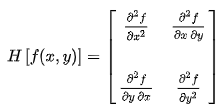

In [8]:
# Esta é a Hessiana da função F(x1,x2) apresenmtado acima.
H = np.array([[2,-2],[-2,4]]) 

Steps para implementar o metodo de newton 
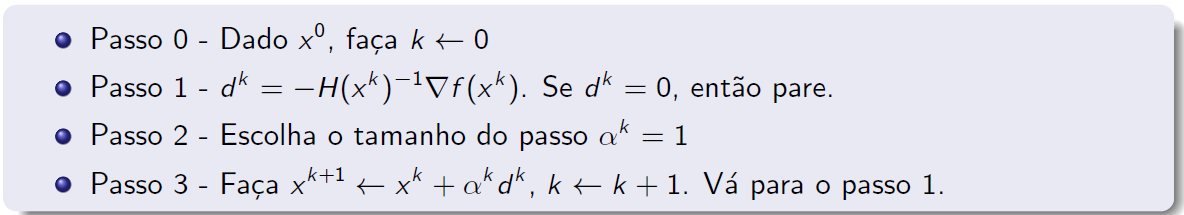

In [9]:
#Inicializando
alpha = 1
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [10]:
#Metodo de Newton
for k in range(0,interaction):
    x = x - alpha*np.linalg.inv(H)@grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break 

[1. 1.] 0


In [11]:
#Com Newton temos a solução em apenas um passo.
x

array([1., 1.])

--------------
## Método de Levenberg-Marquardt - LM

Retrabalhando a formula que temos que minizar, temos: \
$ r = (x_1 - x_2)^{2} + (x_2 - 1)^{2}           $

Com a equação acima, temos o precisamos para usar na formulação LM : \
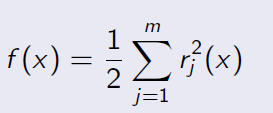

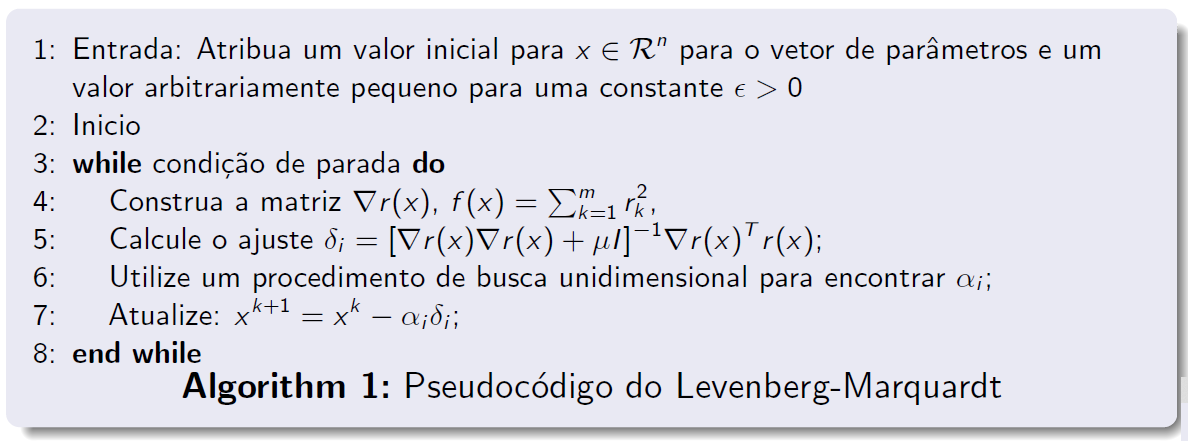

Assim obtemos o gradiente e a Hessiana em LM, e a lei de atualização:
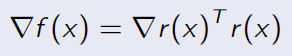

In [12]:
def grad(x1,x2):
    return np.array([x1-x2, 2*x2 -x1 - 1])

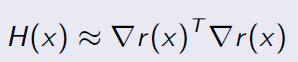

In [17]:
Hessiana = np.array([ [1,0],[-1,1] ]) @ np.array([[1,-1],[0,1]])

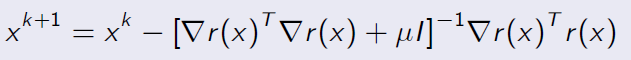

Os cálculos foram feitos em papel e caneta e serão enviados junto com o upload, então aqui iorei direto ao ponto.

In [24]:
#Inicializando
alpha = 1
k = 0
interaction = 500
x = np.array([  random.randint(0, 10)  ,  random.randint(0, 10)  ])

In [25]:
#Metodo de LM
for k in range(0,interaction):
    x = x - alpha*np.linalg.inv(Hessiana + 0.00001) @ grad(x[0],x[1])    
    print(x, k)
    if np.linalg.norm(grad(x[0],x[1])) < 1.0e-09:
        break

[1.00047998 1.00031998] 0
[1.00000002 1.00000002] 1
[1. 1.] 2


In [26]:
# Não convergia com um passo, mas foi incrivelmente performatico com apenas três passos
x

array([1., 1.])